In [135]:
# Import Modules
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [136]:
# Load the Data
raw_Data= pd.read_excel('BMED_data.xlsx')

# Data Grouping
group_checker = list(raw_Data[['T','V','E','Ci']].iloc[0])
group_index = []
for i in range(len(raw_Data)):
    if not group_checker == list(raw_Data[['T','V','E','Ci']].iloc[i]):
        group_index.append(i)
        group_checker = list(raw_Data[['T','V','E','Ci']].iloc[i])

# MB data
MB_Data = raw_Data[['T','V','E','Ci','t','CF','CA']]
sub_MB_Data = []
for  i in range(len(group_index)):
    if i == 0:
        sub_MB_Data.append(MB_Data.iloc[:group_index[i]])
    else:
        sub_MB_Data.append(MB_Data.iloc[group_index[i-1]:group_index[i]].reset_index(drop=True))

In [170]:
# Set the training data
X = MB_Data[['T','V','E','Ci','t']].values
Y = MB_Data[['CF']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

# Declare the Custom Models
class CustomModel_CF(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,40),
            nn.ReLU(),
            nn.Linear(40,20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.ReLU(),
            nn.Linear(10,5),
        )

    def forward(self, x):
        t = x[:,4].unsqueeze(1)
        C0 = x[:,3].unsqueeze(1)
        a0, a1, a2, a3, a4 = self.hidden(x).chunk(5, dim=1)

        k = 1e-7*(a0 + a1*t + a2*(t**2) + a3*(t**3) + a4*(t**4))


        return C0*torch.exp(-k*t)
    
# NN model initialization
model_CF = CustomModel_CF()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CF.parameters(1e-10), lr = 0.001)

# Learning Loop
num_epochs = 1000000
losses = []

for epoch in range(num_epochs):
    # forward_propagation
    y_pred = model_CF(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')


        

Epoch [1000/1000000], Loss: 0.158984
Epoch [2000/1000000], Loss: 0.092348
Epoch [3000/1000000], Loss: 0.078039
Epoch [4000/1000000], Loss: 0.048095
Epoch [5000/1000000], Loss: 0.039881
Epoch [6000/1000000], Loss: 0.024844
Epoch [7000/1000000], Loss: 0.016360
Epoch [8000/1000000], Loss: 0.013676
Epoch [9000/1000000], Loss: 0.011814
Epoch [10000/1000000], Loss: 0.010748
Epoch [11000/1000000], Loss: 0.009690
Epoch [12000/1000000], Loss: 0.009141
Epoch [13000/1000000], Loss: 0.008642
Epoch [14000/1000000], Loss: 0.007816
Epoch [15000/1000000], Loss: 0.006683
Epoch [16000/1000000], Loss: 0.005645
Epoch [17000/1000000], Loss: 0.004967
Epoch [18000/1000000], Loss: 0.004496
Epoch [19000/1000000], Loss: 0.004274
Epoch [20000/1000000], Loss: 0.004126
Epoch [21000/1000000], Loss: 0.003941
Epoch [22000/1000000], Loss: 0.003864
Epoch [23000/1000000], Loss: 0.003697
Epoch [24000/1000000], Loss: 0.003645
Epoch [25000/1000000], Loss: 0.003457
Epoch [26000/1000000], Loss: 0.003364
Epoch [27000/1000000]

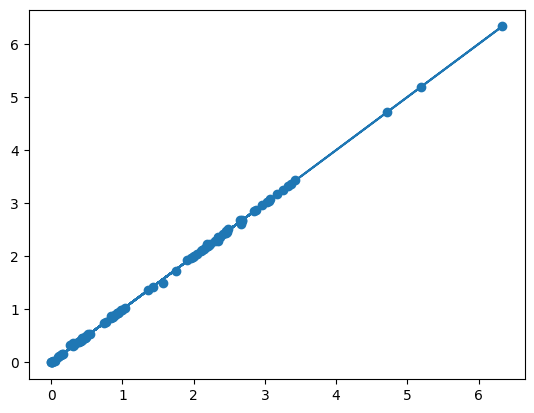

In [171]:
y_pred2 = model_CF(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [172]:
torch.save(model_CF.state_dict(), 'model_CF.pth')

In [206]:
# Set the training data
X = MB_Data[['T','V','E','Ci','t']].values
Y = MB_Data[['CA']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

# Declare the Custom Models
class CustomModel_CA(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,40),
            nn.ReLU(),
            nn.Linear(40,20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.ReLU(),
            nn.Linear(10,5),
        )

    def forward(self, x):
        t = x[:,4].unsqueeze(1)
        a0, a1, a2, a3, a4 = self.hidden(x).chunk(5, dim=1)

        k = 1e-7*(a0 + a1*t + a2*(t**2) + a3*(t**3) + a4*(t**4))


        return torch.exp(k*t)-1
    
# NN model initialization
model_CA = CustomModel_CA()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CA.parameters(1e-10), lr = 0.001)

# Learning Loop
num_epochs = 1000000
losses = []

for epoch in range(num_epochs):
    # forward_propagation
    y_pred = model_CA(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')


        

Epoch [1000/1000000], Loss: 0.203559
Epoch [2000/1000000], Loss: 0.102571
Epoch [3000/1000000], Loss: 0.029377
Epoch [4000/1000000], Loss: 0.018841
Epoch [5000/1000000], Loss: 0.019297
Epoch [6000/1000000], Loss: 0.011453
Epoch [7000/1000000], Loss: 0.008626
Epoch [8000/1000000], Loss: 0.007216
Epoch [9000/1000000], Loss: 0.006562
Epoch [10000/1000000], Loss: 0.006133
Epoch [11000/1000000], Loss: 0.005662
Epoch [12000/1000000], Loss: 0.005198
Epoch [13000/1000000], Loss: 0.004813
Epoch [14000/1000000], Loss: 0.004410
Epoch [15000/1000000], Loss: 0.004156
Epoch [16000/1000000], Loss: 0.003919
Epoch [17000/1000000], Loss: 0.003404
Epoch [18000/1000000], Loss: 0.002941
Epoch [19000/1000000], Loss: 0.002681
Epoch [20000/1000000], Loss: 0.002485
Epoch [21000/1000000], Loss: 0.002361
Epoch [22000/1000000], Loss: 0.002508
Epoch [23000/1000000], Loss: 0.002178
Epoch [24000/1000000], Loss: 0.002043
Epoch [25000/1000000], Loss: 0.001987
Epoch [26000/1000000], Loss: 0.001841
Epoch [27000/1000000]

KeyboardInterrupt: 

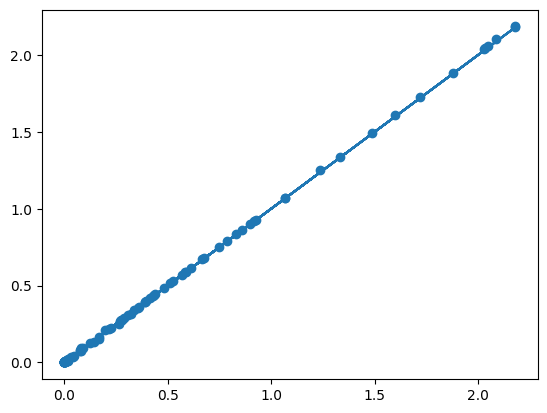

In [207]:
y_pred2 = model_CA(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [208]:
torch.save(model_CA.state_dict(), 'model_CA.pth')